CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.4 µs


<IPython.core.display.Javascript object>


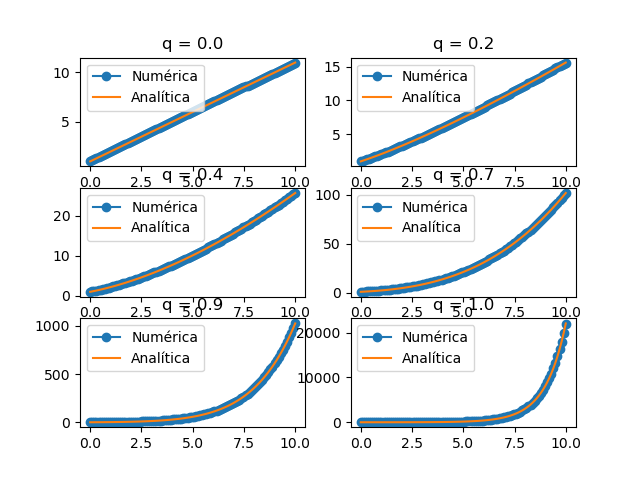

In [10]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve
from IPython.display import IFrame
import time

Q = np.array([0, 0.2,0.4,0.7,0.9,1])
N = 100
t = np.linspace(0,10,N)

def U (t, q):
    if q == 1:
        u = np.exp(t)
    
    if q <1:
        u = np.zeros(len(t))
        for i in range(len(t)):
            a = t[i]*(1-q) +1
            if a>0:
                u[i] = a**(1/(1-q))
    return u
r = np.array([0, 1])

def solucion():
    sol = np.zeros(len(Q))
    %time
    for i in range(len(sol)):
        q = Q[i]
        def darU(q0, u0):
            if q==1:
                u = u0
            else:
                u = u0**q
            return u
        solucion = solve_ivp(darU,(t[0], t[-1]), r, t_eval = t, method = "RK45")
        sol = np.append(sol,solucion)
    return sol

Sol = solucion()
fig,ax = plt.subplots(3,2)
indice_1 = 0
indice_2 = 6
for i in range(3):
    for j in range(2):
        ax[i,j].set_title(f"q = {Q[indice_1]}")
        ax[i,j].plot(t,Sol[indice_2].y[1], marker = "o",label = "Numérica")
        ax[i,j].plot(t,U(t,Q[indice_1]), label = "Analítica")
        ax[i,j].legend()
        indice_1 += 1
        indice_2 += 1

plt.show()